In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read csv file into a pandas dataframe
df = pd.read_csv('logregdata.csv')
df

,time,sentences,type
0,2.7,2.5,0
1,1.4,2.3,0
2,3.3,2.4,0
3,1.3,1.8,0
4,3.0,3.0,0
5,7.6,2.7,1
6,5.9,2.2,1
7,6.9,1.8,1
8,8.6,3.5,1
9,7.7,3.5,1


In [3]:
train_df = df[:-1]
test_df = df[-1:]

train_df, test_df

(   time  sentences  type
 0   2.7        2.5     0
 1   1.4        2.3     0
 2   3.3        2.4     0
 3   1.3        1.8     0
 4   3.0        3.0     0
 5   7.6        2.7     1
 6   5.9        2.2     1
 7   6.9        1.8     1
 8   8.6        3.5     1
 9   7.7        3.5     1,
     time  sentences  type
 10   1.9        3.1     0)

In [4]:
# Partion the data into X and y
X_train = train_df[['time', 'sentences']].values
y_train = train_df['type'].values

X_test = test_df[['time', 'sentences']].values
y_test = test_df['type'].values

X_train, y_train, X_test, y_test

(array([[2.7, 2.5],
        [1.4, 2.3],
        [3.3, 2.4],
        [1.3, 1.8],
        [3. , 3. ],
        [7.6, 2.7],
        [5.9, 2.2],
        [6.9, 1.8],
        [8.6, 3.5],
        [7.7, 3.5]]),
 array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1]),
 array([[1.9, 3.1]]),
 array([0]))

In [5]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def loss(y, y_pred):
    return (-y * np.log(y_pred) - (1 - y) * np.log(1 - y_pred)).mean()

def update_weights(X, y, w, b, alpha):
    N = len(X)
    y_pred = sigmoid(np.dot(X, w) + b)
    dw = (1/N) * np.dot(X.T, (y_pred - y))
    db = (1/N) * np.sum(y_pred - y)
    w = w - alpha * dw
    b = b - alpha * db
    return w, b

def train(X, y, w, b, alpha=0.001, iterations=100):
    loss_history = []
    for i in range(iterations):
        w, b = update_weights(X, y, w, b, alpha)
        y_pred = sigmoid(np.dot(X, w) + b)
        loss_history.append(loss(y, y_pred))
    return w, b, loss_history

def predict(X, w, b):
    y_pred = sigmoid(np.dot(X, w) + b)
    y_pred = [1 if i > 0.5 else 0 for i in y_pred]
    return y_pred

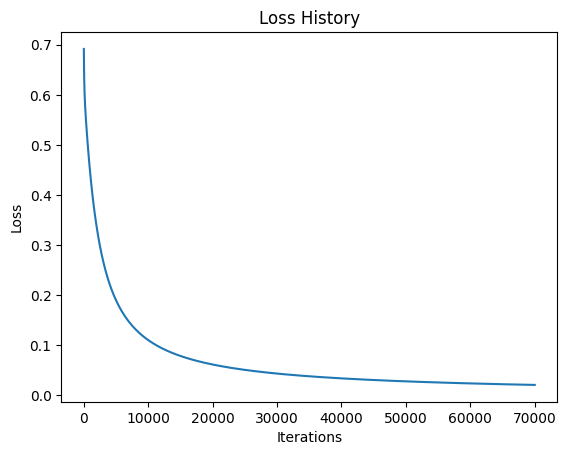

[0]

In [6]:
# train the model
w = np.zeros(X_train.shape[1])
w, b, loss_history = train(X_train, y_train, w, 0, alpha=0.001, iterations=70000)

# plot the loss history over the iterations
plt.plot(loss_history)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss History')
plt.show()

# predict the test data
y_pred = predict(X_test, w, b)
y_pred

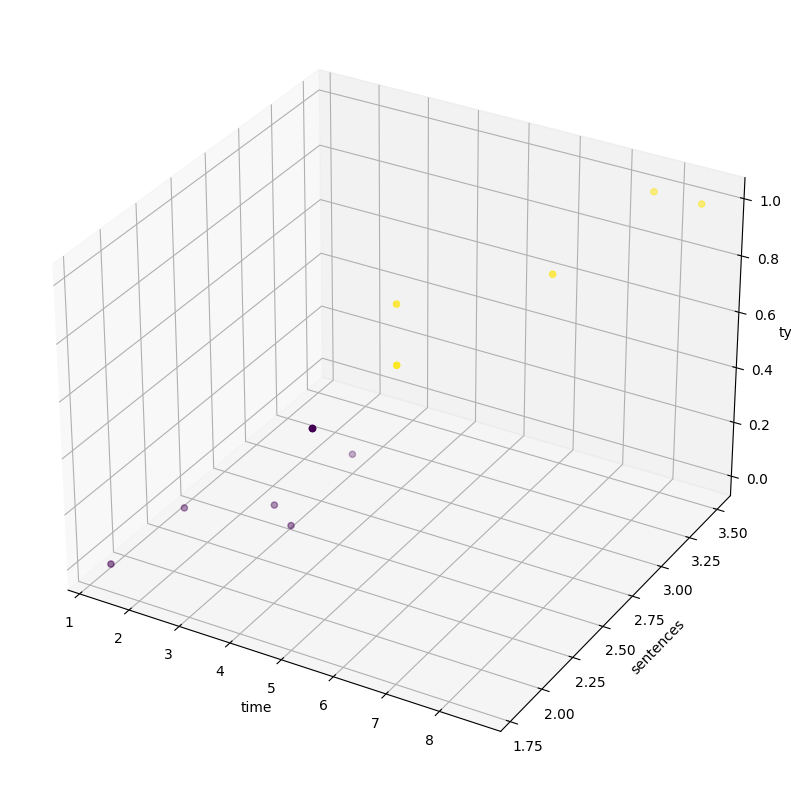

In [7]:
# Plot the data in 3d
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:, 0], X_train[:, 1], y_train, c=y_train, cmap='viridis')
ax.set_xlabel('time')
ax.set_ylabel('sentences')
ax.set_zlabel('type')

# Plot the test data
ax.scatter(X_test[:, 0], X_test[:, 1], y_test, c=y_test, cmap='viridis')

# Plot the predicted data
ax.scatter(X_test[:, 0], X_test[:, 1], y_pred, c=y_pred, cmap='viridis')